In [106]:
import numpy as np

import matplotlib.pyplot as plt

In [107]:
def cosd(v1,v2):
    return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [108]:
def calc_perpendicular_distance(N, ref_dirs):
    u = np.tile(ref_dirs, (len(N), 1))
    v = np.repeat(N, len(ref_dirs), axis=0)

    norm_u = np.linalg.norm(u, axis=1)
    #print("norm_u", norm_u)

    scalar_proj = np.sum(v * u, axis=1) / norm_u
    #print("scalar_proj", scalar_proj)
    proj = scalar_proj[:, None] * u / norm_u[:, None]
    #print("proj", proj)
    val = np.linalg.norm(proj - v, axis=1)
    #print("val", val)
    matrix = np.reshape(val, (len(N), len(ref_dirs)))

    return matrix

In [109]:
niches = np.array([
    [0,1],
    [1,0]
])
niches

array([[0, 1],
       [1, 0]])

In [110]:
niches = np.array([
    [0.3,0.8],
    [0.5,0.1]
])
niches

array([[0.3, 0.8],
       [0.5, 0.1]])

In [111]:
N = np.random.random(size=(20,2))
N

array([[0.86010714, 0.6745889 ],
       [0.90269695, 0.51749136],
       [0.02468619, 0.58994646],
       [0.93762616, 0.92270346],
       [0.34699085, 0.65259402],
       [0.53914096, 0.7901658 ],
       [0.11176983, 0.56135489],
       [0.67736777, 0.51383591],
       [0.87910963, 0.63382229],
       [0.8412054 , 0.87340403],
       [0.54902917, 0.26297441],
       [0.24024865, 0.69806254],
       [0.60242776, 0.50388212],
       [0.6526991 , 0.83937478],
       [0.42295597, 0.38264538],
       [0.23363244, 0.05091299],
       [0.09918087, 0.09412451],
       [0.1220254 , 0.54737926],
       [0.76362476, 0.46195773],
       [0.3863605 , 0.28944226]])

In [112]:
map_cosd=[]
for ref in niches:   
    dmin,v,pos=1,[],0 
    for i in range(len(N)):
        d=cosd(1-np.array(ref),np.array(N[i]))
        print(d)
        if d<dmin:
            dmin=d
            #v=F[i]
            sol = N[i]
            pos=i
    map_cosd.append([ref,sol,pos])

0.9261211233191846
0.9708041860911583
0.3146805223232793
0.8780246283989771
0.6939729050380261
0.7688602492404218
0.457193185293531
0.9320854167459274
0.9406112807805806
0.864884904709571
0.9858556044510393
0.5726762843390695
0.9137982775713299
0.8071054922335994
0.8973351574394409
0.9979696150823238
0.886557180056264
0.47735288052808156
0.9648946402872782
0.93424588340443
0.9216057858348885
0.8560783077271676
0.8936968225577353
0.9592894012416776
0.9998306187132319
0.9958022916799375
0.9521621287477364
0.9152252625111894
0.9051651285932019
0.9665125274680904
0.8156141009279315
0.9846164132474723
0.9333573353345037
0.9881907389561047
0.9465931866553483
0.6606341675370196
0.95401164681967
0.9588824508550321
0.8679961345913694
0.9127867660929241


In [113]:
map_cosd

[[array([0.3, 0.8]), array([0.02468619, 0.58994646]), 2],
 [array([0.5, 0.1]), array([0.23363244, 0.05091299]), 15]]

In [114]:
dist_matrix = calc_perpendicular_distance(N, niches)
print(dist_matrix)
niche_of_individuals = np.argmin(dist_matrix, axis=1)
#print(niche_of_individuals)
dist_to_niche = dist_matrix[np.arange(N.shape[0]), niche_of_individuals]
print(dist_to_niche)
closest = dist_matrix[:, np.unique(niche_of_individuals)].argmin(axis=0)
dists = dist_matrix[closest,np.unique(niche_of_individuals)]
print(closest)
perpen = list(zip(niches[np.unique(niche_of_individuals)],N[closest],closest,dists))

[[0.56847944 0.49280795]
 [0.66351814 0.33040859]
 [0.18402963 0.57364874]
 [0.55394391 0.72090157]
 [0.0957566  0.57187058]
 [0.22736768 0.66908707]
 [0.09245151 0.52853389]
 [0.45381938 0.37101481]
 [0.60058613 0.44910631]
 [0.48097253 0.69146916]
 [0.42173555 0.15019414]
 [0.0201543  0.63739   ]
 [0.38714586 0.37595127]
 [0.31641705 0.69506986]
 [0.26167026 0.29226617]
 [0.20088013 0.00410521]
 [0.05981662 0.0728457 ]
 [0.07794175 0.51281838]
 [0.55279996 0.30322768]
 [0.26013064 0.20804996]]
[0.49280795 0.33040859 0.18402963 0.55394391 0.0957566  0.22736768
 0.09245151 0.37101481 0.44910631 0.48097253 0.15019414 0.0201543
 0.37595127 0.31641705 0.26167026 0.00410521 0.05981662 0.07794175
 0.30322768 0.20804996]
[11 15]


In [115]:
perpen

[(array([0.3, 0.8]),
  array([0.24024865, 0.69806254]),
  11,
  0.020154299423041425),
 (array([0.5, 0.1]),
  array([0.23363244, 0.05091299]),
  15,
  0.004105207370179643)]

Text(0.5, 1.0, 'Cosine distance')

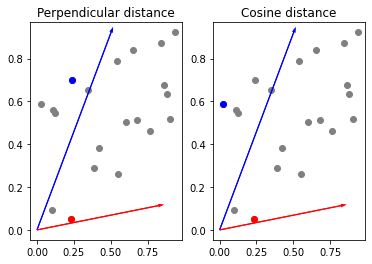

In [116]:
#fig = plt.figure(figsize=(4,4))

scale = 0.6

ax = plt.subplot(1,2,1)

x, y = np.zeros((2,niches.shape[1]))
u, v = niches
#ax.quiver(x,y,u,v,color="blue", label="Ref dirs", zorder=0)
ax.scatter(N[:,0], N[:,1], color="grey", label="Solutions")
colors = ["blue", "red", "green"]
i = 0
for ref,sol,idx,d in perpen:
    ax.scatter(sol[0],sol[1],color=colors[i])
    x, y = np.zeros((2,niches.shape[1]))
    u, v = ref
    ax.quiver(x,y,u,v,color=colors[i], label="Ref dirs", scale=scale)
    i += 1
ax.set_title("Perpendicular distance")
    
ax = plt.subplot(1,2,2)

x, y = np.zeros((2,niches.shape[1]))
u, v = niches
#ax.quiver(x,y,u,v,color="blue", label="Ref dirs", zorder=0)
ax.scatter(N[:,0], N[:,1], color="grey", label="Solutions")
colors = ["blue", "red", "green"]
i = 0
for ref,sol,idx in map_cosd:
    ax.scatter(sol[0],sol[1],color=colors[i])
    x, y = np.zeros((2,niches.shape[1]))
    u, v = ref
    ax.quiver(x,y,u,v,color=colors[i], label="Ref dirs", scale=scale)
    i += 1
ax.set_title("Cosine distance")